Housing Dataset

Handling missing values

In [5]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset(r"C:\Users\Dell\Downloads\housing.csv") #file path lekhne
df.head(5)
print("Original DataFrame with Missing Values:")
print(df)
print(df.isnull().sum())#count of missing values per column dekhaucha(total_bedrooms ko matra values missing raicha)

# Remove missing values
# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)

# Impute missing values with the mean
df_mean = df
df_mean['total_bedrooms'].fillna(df_mean['total_bedrooms'].mean(), inplace=True)
print("\nDataFrame after imputing numerical columns with mean:")
print(df_mean)

Original DataFrame with Missing Values:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       popu

C:\Users\Dell\AppData\Local\Temp\ipykernel_17268\2500760271.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['total_bedrooms'].fillna(df_mean['total_bedrooms'].mean(), inplace=True)


handling categorical data


since there are no NaN in ocean proximity it doesnot require to be replaced by its mode

In [6]:
from sklearn.preprocessing import LabelEncoder
# Apply Label Encoding to 'ocean_proximity'
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
print("\nDataFrame after Label Encoding for 'ocean_proximity':\n", df)


DataFrame after Label Encoding for 'ocean_proximity':
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0

feature scaling

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()
# Apply scalers
df_standard =pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_minmax =pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
df_robust =pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
df_maxabs =pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)
# Log Transformation (Handling zero by adding 1)
df_log = np.log1p(df)
# Display results
print("\nStandard Scaled Data:\n", df_standard)
print("\nMinMax Scaled Data:\n", df_minmax)
print("\nRobust Scaled Data:\n", df_robust)
print("\nMaxAbs Scaled Data:\n", df_maxabs)
print("\nLog Transformed Data:\n", df_log)


Standard Scaled Data:
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1      -1.322844  1.043185           -0.607019     2.045890        1.355088   
2      -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3      -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4      -1.337818  1.038503            1.856182    -0.462404       -0.615066   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647           -0.289187    -0.444985       -0.390860   
20636  -0.818722  1.806329           -0.845393    -0.888704       -0.925139   
20637  -0.823713  1.778237           -0.924851    -0.174995       -0.126106   
20638  -0.873626  1.778237           -0.845393    -0.355600       -0.307379   
20639  -0.833696  1.750146           -1.004309     0.068408        0.186352   

       population  househol

c:\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


remove total bedroom outlier

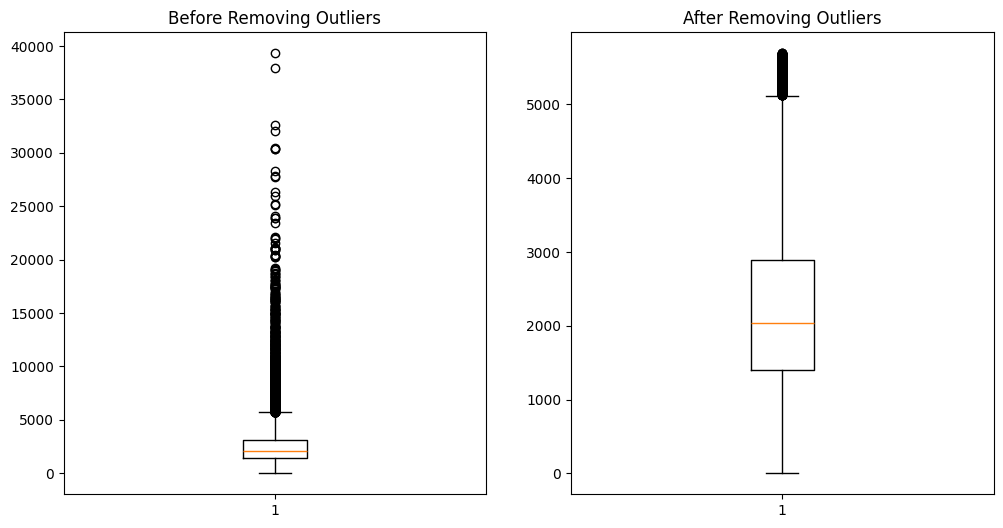

Data after removing outliers:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3  
5       413.0       193.0         4.0368            269700.0                3  


In [9]:
# Calculate Q1, Q3, and IQR
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df_filtered = df[(df['total_rooms'] >= lower_bound) & (df['total_rooms'] <= upper_bound)]
# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.boxplot(df['total_rooms'])
ax1.set_title("Before Removing Outliers")
ax2.boxplot(df_filtered['total_rooms'])
ax2.set_title("After Removing Outliers")
plt.show()
print("Data after removing outliers:")
print(df_filtered.head())

feature selection

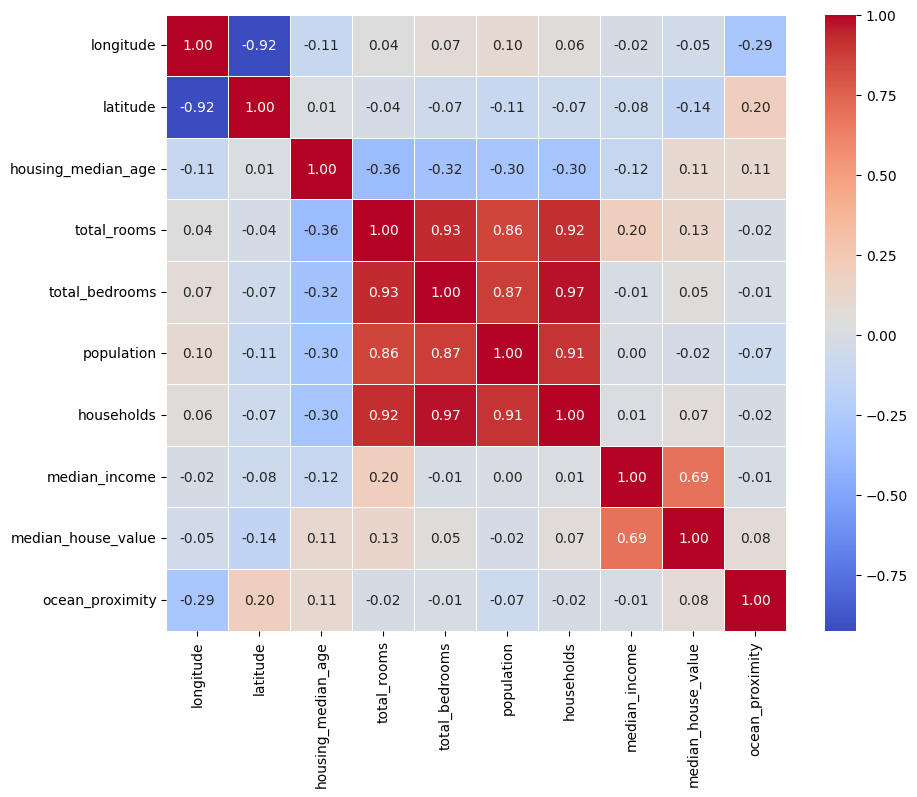

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [10]:
# Calculate correlation matrix
corr_matrix = df.corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()
# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

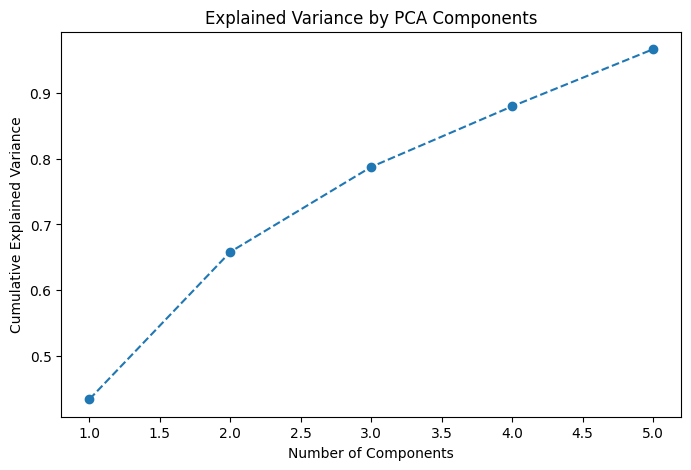

In [11]:
# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_income'], errors='ignore')  # Drop target if applicable
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")  #
scaled_data = imputer.fit_transform(scaled_data)
from sklearn.decomposition import PCA
# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)
# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])
explained_variance = pca.explained_variance_ratio_
# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()